In [1]:
import pandas as pd

data=pd.read_csv('/content/mnc_monthly_revenue.csv')



In [5]:
rows= data.shape[0]
columns = data.shape[1]
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 100
Number of columns: 32


In [14]:
print("\n2. Descriptive Statistics:\n")
print("\nMean:\n", data.mean(numeric_only=True))
print("\n\nMedian:\n", data.median(numeric_only=True))
print("\n\nStandard Deviation:\n", data.std(numeric_only=True))
print("\n\nVariance:\n", data.var(numeric_only=True))



2. Descriptive Statistics:


Mean:
 Month_1     536.25
Month_2     519.94
Month_3     565.44
Month_4     531.89
Month_5     565.17
Month_6     589.39
Month_7     557.28
Month_8     536.65
Month_9     578.14
Month_10    537.61
Month_11    534.08
Month_12    525.28
Month_13    556.40
Month_14    530.66
Month_15    543.04
Month_16    530.51
Month_17    539.16
Month_18    576.12
Month_19    575.50
Month_20    587.85
Month_21    508.04
Month_22    546.25
Month_23    548.10
Month_24    541.49
Month_25    542.86
Month_26    576.12
Month_27    542.40
Month_28    546.40
Month_29    544.73
Month_30    508.75
Month_31    506.64
dtype: float64


Median:
 Month_1     555.5
Month_2     507.5
Month_3     581.0
Month_4     554.5
Month_5     526.0
Month_6     640.0
Month_7     587.5
Month_8     541.0
Month_9     554.5
Month_10    530.5
Month_11    560.0
Month_12    500.5
Month_13    562.0
Month_14    510.5
Month_15    597.0
Month_16    512.0
Month_17    502.5
Month_18    594.0
Month_19    629.0
Month_

In [41]:
import module as mod
month=input("Enter month: ").capitalize()
print("Custom mean: ",mod.custom_mean(data[month].tolist()))
print("Mean using pandas: ",data[month].mean())


Enter month: month_2
Custom mean:  519.94
Mean using pandas:  519.94


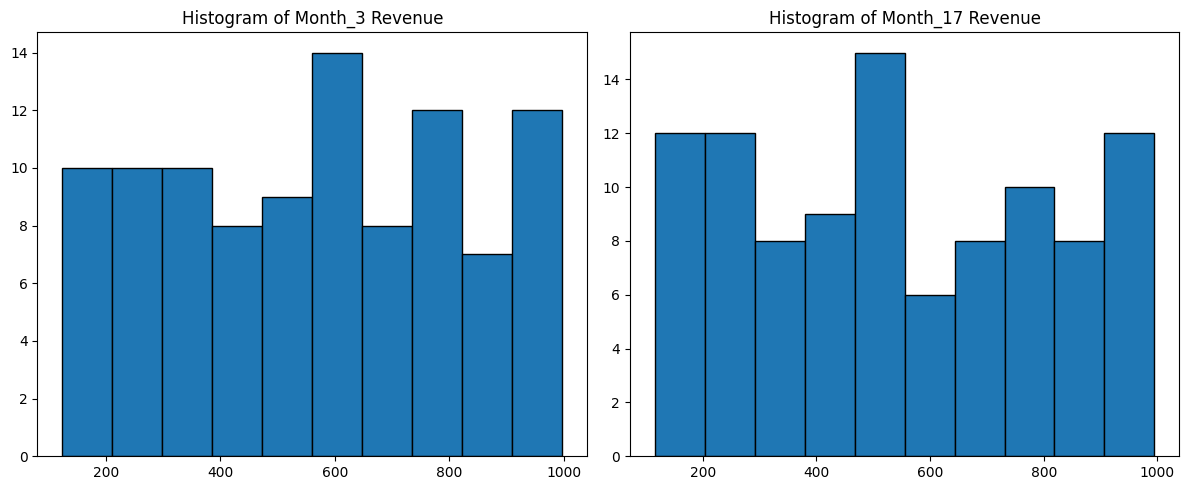

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data["Month_3"], bins=10, edgecolor="black")
plt.title('Histogram of Month_3 Revenue')

plt.subplot(1, 2, 2)
plt.hist(data["Month_17"], bins=10, edgecolor="black")
plt.title("Histogram of Month_17 Revenue")
plt.tight_layout()
plt.show()

In [78]:
data["Average"] = data.mean(axis=1, numeric_only=True)
data["Class"] = data["Average"].apply(lambda x: 1 if x > 650 else 0)
high_percentage = data["Class"].value_counts(normalize=True)[1] * 100
low_percentage = data["Class"].value_counts(normalize=True)[0] * 100
print("\n5. High vs Low Performing Brands:")
print(f"High Performing: {high_percentage:.2f}%")
print(f"Low Performing: {low_percentage:.2f}%")


5. High vs Low Performing Brands:
High Performing: 1.00%
Low Performing: 99.00%


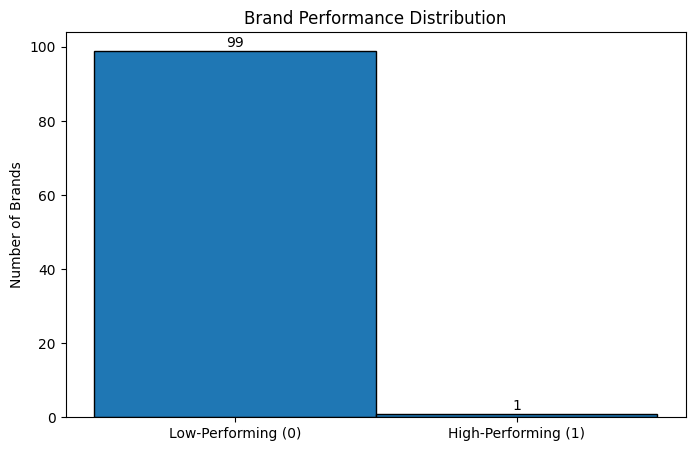

In [83]:
plt.figure(figsize=(8, 5))
plt.hist(data['Class'], bins=[-0.5, 0.5, 1.5], edgecolor='black')

plt.xticks([0, 1], ['Low-Performing (0)', 'High-Performing (1)'])
plt.ylabel('Number of Brands')
plt.title('Brand Performance Distribution')

for i in [0, 1]:
    count = len(data[data['Class'] == i])
    plt.text(i, count + 1, str(count), ha='center')

plt.show()

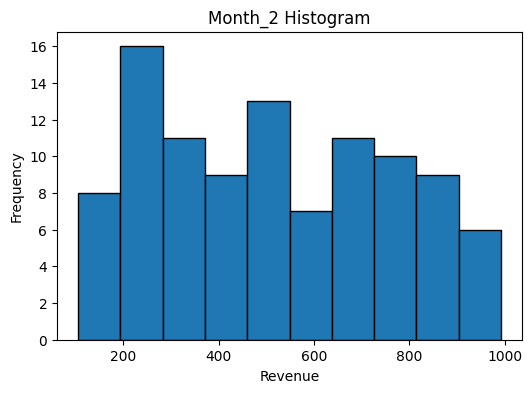

Month_2 → Skewness: 0.14 → Symmetric


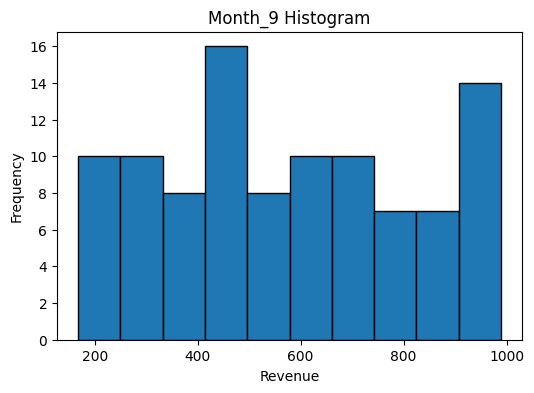

Month_9 → Skewness: 0.09 → Symmetric


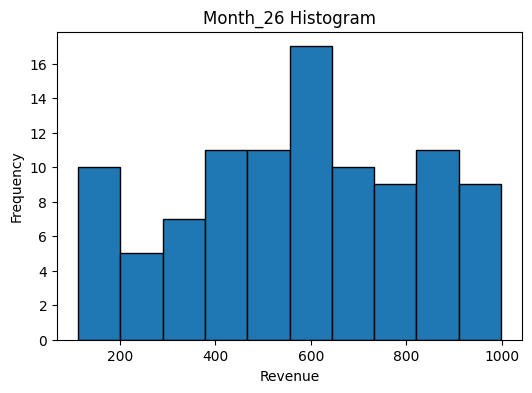

Month_26 → Skewness: -0.17 → Symmetric


In [90]:
months = ['Month_2', 'Month_9', 'Month_26']

for month in months:
    data[month].plot(kind='hist', bins=10, edgecolor='black', title=f'{month} Histogram', figsize=(6, 4))
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
    plt.show()

    skew = data[month].skew()
    if skew > 0.5:
        shape = "Right-Skewed"
    elif skew < -0.5:
        shape = "Left-Skewed"
    else:
        shape = "Symmetric"
    print(f"{month} → Skewness: {skew:.2f} → {shape}")

In [109]:
# Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Find strongly positive correlated pairs (r > 0.7)
strong_pos_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] > 0.7:
            strong_pos_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                round(corr_matrix.iloc[i,j], 2)
            ))

print("Strong Positive Correlations:")
for pair in strong_pos_pairs[:3]:  # Show top 3 pairs
    print(f"{pair[0]} & {pair[1]}: r = {pair[2]}")

Strong Positive Correlations:


In [110]:
for i in range(min(2, len(positive_corrs))):
    m1 = positive_corrs.iloc[i]['Month1']
    m2 = positive_corrs.iloc[i]['Month2']
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df[[m1, m2]])
    plt.title(f'BoxPlot: {m1} and {m2}')
    plt.show()

In [107]:
print(corr_matrix)
negative_corrs = corr_matrix[(corr_matrix < -0.5)].stack().reset_index()
negative_corrs.columns = ['Month1', 'Month2', 'Correlation']
print("\n11. Strong Negative Correlations (r < -0.5):\n", negative_corrs.head())

           Month_1   Month_2   Month_3   Month_4   Month_5   Month_6  \
Month_1   1.000000  0.055825  0.040139 -0.216684 -0.039941  0.112978   
Month_2   0.055825  1.000000 -0.101134 -0.042946 -0.224144 -0.133400   
Month_3   0.040139 -0.101134  1.000000 -0.202299  0.140535  0.120943   
Month_4  -0.216684 -0.042946 -0.202299  1.000000 -0.016342  0.028957   
Month_5  -0.039941 -0.224144  0.140535 -0.016342  1.000000 -0.004050   
Month_6   0.112978 -0.133400  0.120943  0.028957 -0.004050  1.000000   
Month_7   0.047578  0.066925  0.130319 -0.228140 -0.032738  0.079913   
Month_8  -0.149981  0.013111  0.076470 -0.044044  0.009709 -0.193862   
Month_9  -0.109413  0.114003 -0.079126  0.121025 -0.093700 -0.069045   
Month_10  0.074394 -0.003032 -0.003095 -0.035210 -0.038486  0.071736   
Month_11  0.166007  0.065409  0.137856  0.076079 -0.126995  0.061622   
Month_12  0.189670  0.010691  0.261714  0.089472  0.051506 -0.016999   
Month_13  0.284120  0.068464 -0.044621  0.044832 -0.027734  0.11